# 19. Упаковка кругов в единичных круг
Задача состоит в упаковке в единичный круг *n* равных кругов радиуса *r*, при этом *r* должен быть максимальным.

# Решение

Для упрощения вычислений сведем задачу максимизации к задаче минимизации. Переформулируем слудющим образом : упаковать n единичных кругов в круг наименьшего радиуса *R*. 

In [103]:
import numpy as np
import random
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

Создается массив **comprasion**, в котором содержаться данные, взятые с сайта www.packomania.com

In [104]:
comprasion = np.array(
    [1.000000000000000000000000000000, 0.500000000000000000000000000000, 0.464101615137754587054892683012, 0.414213562373095048801688724210,
     0.370191908158750137702237641058, 0.333333333333333333333333333333, 0.333333333333333333333333333333, 0.302593388348611302909204224934,
     0.276768653914155215717770973808, 0.262258924190165855095630653709, 0.254854701717148909608835737700, 0.248163470571686841544054487132,
     0.236067977499789696409173668731, 0.231030727971008638446179972284, 0.221172539086390937264316484926, 0.216664742924422421010647936933,
     0.208679665570499743200080125264, 0.205604646759568224693193969093, 0.205604646759568224693193969093, 0.195224011018748878291305694833,
     0.190392146849053511968808973057, 0.183833026581681677264411480513, 0.180336009254436500349252193252, 0.176939130595961682695732682453,
     0.173827661421222233359259594413, 0.171580252187166848283936226172, 0.169307931134573046568970317658, 0.166252750038606935814942389058,
     0.162903649276644353945069772319, 0.161349109064689865167358846536])

Функция **limits** создает массив **mass**, в котором содержатся ограничения для кругов. Сначала добавляются выражения вида (где R радиус большого круга, r радиус малого и равен 1, x и y координаты малого круга, n количество кругов) :  $$ (R - r)^2 - x_i^2 - y_ {i+1} ^2 \ge 0$$
Потом добавляются выражения вида : $$ (x_{i} - x_{j})^2 + (y_{i+1} - y_{j+1})^2 - 4*r \ge 0$$
Затем: $$R - 1 \ge 0$$
И: $$n - R\ge 0$$

In [105]:
def limits(x):
    mass = []
    for i in range(1, 2*n, 2):
        mass = np.append(mass, (x[0]-1)**2 - x[i]**2 - x[i+1]**2)
    for i in range(1, 2*n, 2):
        for j in range(i+2, 2*n + 1, 2):
            mass = np.append(mass, (x[i] - x[j])**2 + (x[i+1] - x[j+1])**2 - 4)
    mass = np.append(mass, x[0] - 1)
    mass = np.append(mass, n - x[0])
    return mass

В функции **main** происходит следующее: Cоздается массив **arr** из *2n + 1* элементов, где *arr[0]* - *R* радиус большогог круга, *(arr[i], arr[i+1]), i = 1, 3, ..., 2n + 1* - координаты малых кругов. Минимизируется *R* с помощью функции **minimize**, возвращаемся первоначальной задаче - максимизации *r*. Все это происходит в цикле для более точного приближения (пока разница с значениями из массива comprasion не будет меньше 0.001). После рисуется график.

In [137]:
def main(n):
    delta = 0;
    while (delta < comprasion[n-1] - 0.001):
        arr = [random.uniform(-n,n) for i in range(2*n+1)]
        arr[0] = n
        ans = minimize(lambda x: x[0], arr, constraints=({'type':'ineq','fun': limits}))
        x = ans.x / ans.x[0] ## возвращаемся к первоначальной задаче 
        x[0] /= ans.x[0]
        delta = x[0]
    print("Разница с таблицой с сайта www.packomania.co состовляет ", abs(delta-comprasion[n-1]))
    
    circle = []  ## Рисуется график с большим кругом и малыми 
    figure, xr = plt.subplots()
    plt.xlim(-1.2,1.2)
    plt.ylim(-1.2,1.2)
    xr.set_aspect(1)
    xr.add_artist(plt.Circle((0, 0), 1, color='pink')) 
    for i in range(1, 2*n+1, 2):
        circle = plt.Circle((x[i], x[i+1]), x[0])
        xr.add_artist(circle) 
        
    pass
    
    return

Разница с таблицой с сайта www.packomania.co состовляет  2.220446049250313e-16


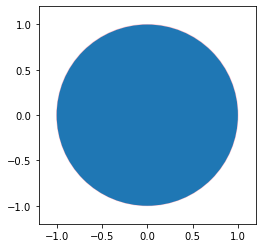

In [107]:
n = 1 
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  2.205813642852661e-09


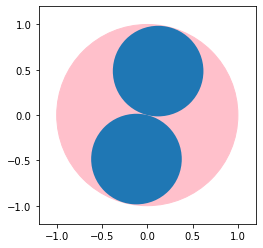

In [108]:
n = 2
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  8.778684112975554e-09


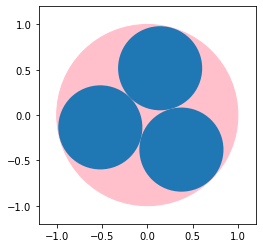

In [109]:
n = 3 
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  9.500822351071747e-11


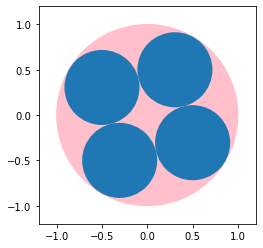

In [110]:
n = 4
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  1.4884260490788392e-11


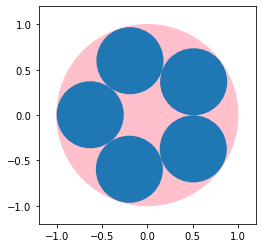

In [111]:
n = 5 
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  7.351896869067787e-13


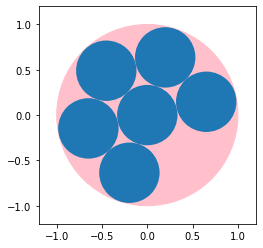

In [112]:
n = 6 
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  3.5666963271729912e-09


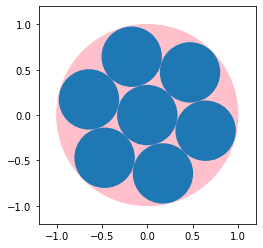

In [113]:
n = 7
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  2.7755575615628914e-16


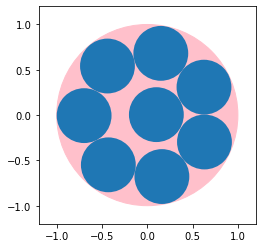

In [114]:
n = 8 
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  2.839368740126247e-10


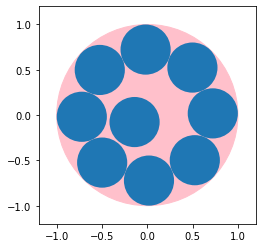

In [115]:
n = 9 
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  5.598750907331862e-10


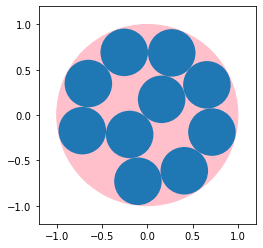

In [116]:
n = 10
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  2.501738927129793e-09


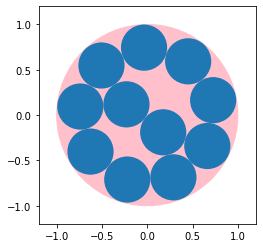

In [117]:
n = 11 
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  1.4083989530178087e-10


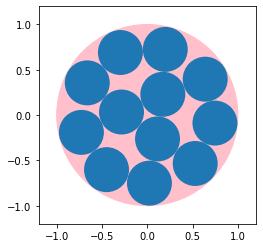

In [118]:
n = 12 
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  9.747952445238184e-12


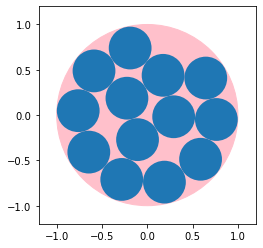

In [119]:
n = 13
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  8.382183835919932e-15


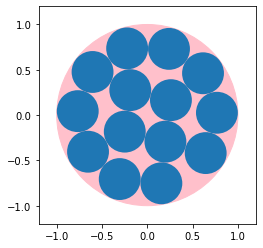

In [120]:
n = 14 
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  0.0002873409678703087


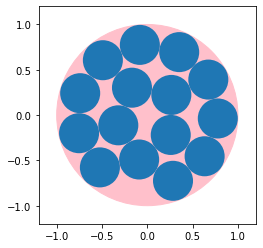

In [121]:
n = 15 
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  2.3883950373004836e-12


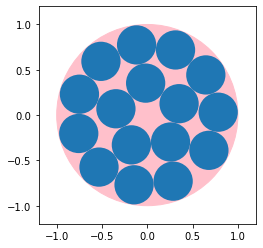

In [122]:
n = 16 
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  0.0003992112901559097


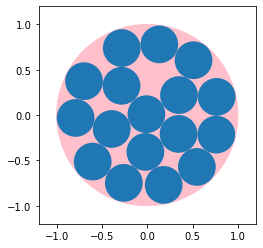

In [123]:
n = 17 
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  3.1118996268730825e-12


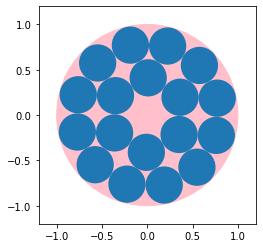

In [124]:
n = 18 
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  2.2942195920805375e-09


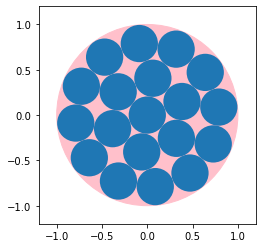

In [125]:
n = 19 
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  9.495451647190123e-11


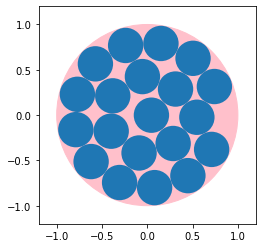

In [126]:
n = 20 
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  1.3877787807814457e-16


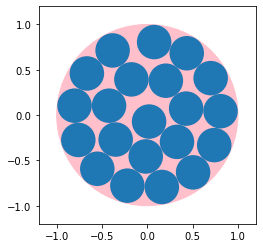

In [127]:
n = 21
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  0.00021027639100554274


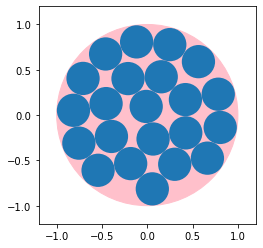

In [131]:
n = 22 
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  0.0006555687170368973


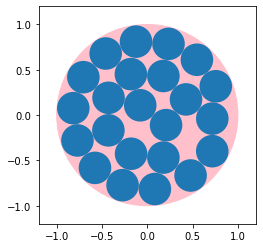

In [132]:
n = 23
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  7.118477617690244e-05


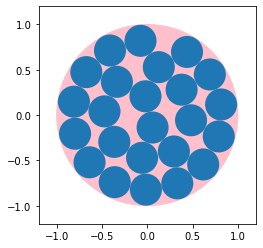

In [134]:
n = 24
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  0.0009494358106242606


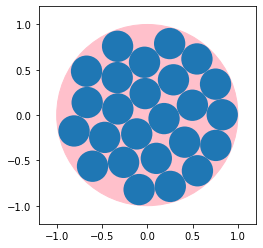

In [136]:
n = 25
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  0.0006550395333186354


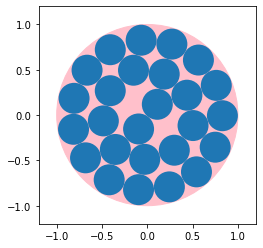

In [138]:
n = 26 
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  8.69493655344944e-06


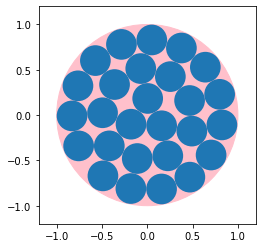

In [143]:
n = 27 
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  0.0007726321838667782


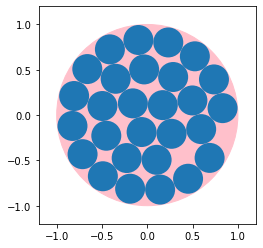

In [146]:
n = 28
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  0.000694761083705725


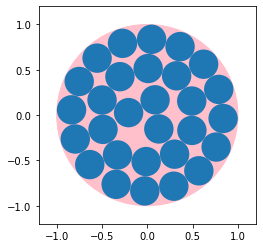

In [147]:
n = 29 
main(n)

Разница с таблицой с сайта www.packomania.co состовляет  0.0008758892220174508


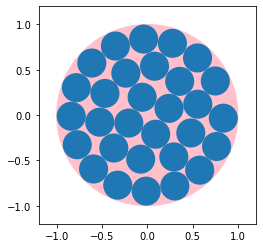

In [149]:
n = 30 
main(n)